In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
import seaborn as sns #for plotting
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.feature_extraction.text import TfidfTransformer
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score
from sklearn.model_selection import cross_val_score
from sklearn.metrics import roc_curve, auc
from nltk.stem.porter import PorterStemmer
from tqdm import tqdm


In [3]:
data = pd.read_csv("/home/shri/Documents/file1.csv")
data = data[["Score","text"]]
clean_data = data['text'].tolist()

# BOW

In [4]:
counting_var = CountVectorizer(ngram_range = (1,2), min_df=10, max_features=4000)
bi_gram = counting_var.fit_transform(np.array(clean_data))
print("-"*110)
print("Shape of BOW : {}".format(bi_gram.get_shape()))
print("-"*110)
print("Unique words : {}".format(bi_gram.get_shape()[1]))
print("-"*110)

--------------------------------------------------------------------------------------------------------------
Shape of BOW : (1500, 1032)
--------------------------------------------------------------------------------------------------------------
Unique words : 1032
--------------------------------------------------------------------------------------------------------------


In [5]:
scores = data['Score'].get_values()
len(scores)

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:1: FutureWarning: The 'get_values' method is deprecated and will be removed in a future version. Use '.to_numpy()' or '.array' instead.
  """Entry point for launching an IPython kernel.


1500

In [6]:
from sklearn.model_selection import TimeSeriesSplit

def k_fold_cross_validation(x_1,y_1):
    li = list(range(0,16))
    
    #creating odd list of vals for 'k'
    neighbors = list(filter(lambda x: x%2 != 0,li))

    #empty list to hold CV scores/accuracy
    cv_scores = []

    
    #performing k-fold cross validation with Times Based Split
    for k in neighbors:
        knn = KNeighborsClassifier(n_neighbors=k,algorithm='auto',n_jobs=-1)
        tscv = TimeSeriesSplit(n_splits=5)
        acc_sum=0
        cnt=0
        for train_index, test_index in tscv.split(x_1):
            X_train, X_test = x_1[train_index], x_1[test_index]
            Y_train, Y_test = y_1[train_index], y_1[test_index]
            knn.fit(X_train,Y_train)
            pred = knn.predict(X_test)
            acc = accuracy_score(Y_test, pred, normalize=True )*float(100)
            acc_sum=acc_sum+acc
            cnt=cnt+1
        cv_scores.append(acc_sum/cnt)
            
            
   
    # determining best k
    optimal_k = neighbors[cv_scores.index(max(cv_scores))]
    print('\nThe optimal number of neighbors is %d.' % optimal_k)

    # plot misclassification error vs k 
    plt.plot(neighbors, cv_scores)

    for xy in zip(neighbors, np.round(cv_scores,3)):
        plt.annotate('(%s, %s)' % xy, xy=xy, textcoords='data')

    plt.xlabel('Number of Neighbors K')
    plt.ylabel('Accuracy Percentage')
    plt.show()

    print("the Accuracy for each k value is : ", np.round(cv_scores,3))
    print('*********************************************************************')
    print("optimal k value is: ",optimal_k)
    return optimal_k;

In [7]:

# Total data frame

x = bi_gram[0:10000]


# this is only Score/rating  of data

y = scores

In [8]:
#splitting the train and test data

x_1, x_test, y_1, y_test = train_test_split(x,y, test_size=0.3, random_state=0)


In [9]:
#x_1 = np.array(x_1)

y_1 = np.array(y_1)

#x_test = np.array(x_test)

y_test = np.array(y_test)

x_1

<1050x1032 sparse matrix of type '<class 'numpy.int64'>'
	with 24653 stored elements in Compressed Sparse Row format>


The optimal number of neighbors is 7.


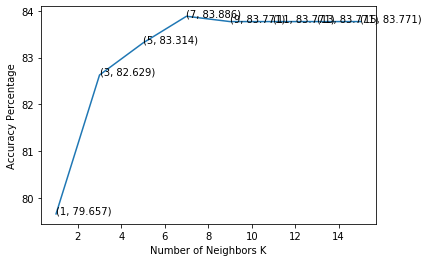

the Accuracy for each k value is :  [79.657 82.629 83.314 83.886 83.771 83.771 83.771 83.771]
*********************************************************************
optimal k value is:  7


In [10]:
optim_k_val = k_fold_cross_validation(x_1,y_1)

In [11]:
knn_optimal = KNeighborsClassifier(n_neighbors=optim_k_val)

# fitting the model
knn_optimal.fit(x_1, y_1)

# predict the response
pred = knn_optimal.predict(x_test)

# evaluate accuracy
acc = accuracy_score(y_test, pred) * 100
print('\nThe accuracy of the knn classifier for k = %d is %f%%' % (optim_k_val, acc))


The accuracy of the knn classifier for k = 7 is 84.666667%


# Tf_idf

In [12]:
tf_idf = TfidfVectorizer(ngram_range=(1,2), min_df=10)
tf_idf.fit(np.array(clean_data))
print("-"*110)
print(tf_idf.get_feature_names()[0:10])
print("-"*110)

--------------------------------------------------------------------------------------------------------------
['able', 'absolutely', 'actual', 'actually', 'add', 'added', 'addicted', 'adding', 'addition', 'adult']
--------------------------------------------------------------------------------------------------------------


In [13]:
tf_idf = tf_idf.transform(np.array(clean_data))
print("-"*110)
print("Shape of BOW : {}".format(tf_idf.get_shape()))
print("-"*110)
print("Unique words : {}".format(tf_idf.get_shape()[1]))
print("-"*110)

--------------------------------------------------------------------------------------------------------------
Shape of BOW : (1500, 1032)
--------------------------------------------------------------------------------------------------------------
Unique words : 1032
--------------------------------------------------------------------------------------------------------------


In [14]:
# store the tf-idf array into pandas dataframe
array = tf_idf.todense()
df = pd.DataFrame(array)
df.head(10)

,0,1,2,3,4,5,6,7,8,9,...,1022,1023,1024,1025,1026,1027,1028,1029,1030,1031
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.000000,0.000000,0.0,0.0,0.0,0.0
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.000000,0.000000,0.0,0.0,0.0,0.0
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.000000,0.000000,0.0,0.0,0.0,0.0
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.000000,0.000000,0.0,0.0,0.0,0.0
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.000000,0.000000,0.0,0.0,0.0,0.0
5,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.170508,0.229891,0.0,0.0,0.0,0.0
6,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.000000,0.000000,0.0,0.0,0.0,0.0
7,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.000000,0.000000,0.0,0.0,0.0,0.0
8,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.000000,0.000000,0.0,0.0,0.0,0.0
9,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.000000,0.000000,0.0,0.0,0.0,0.0


In [15]:

# Total data frame

x = tf_idf[0:1500]

# this is only Score/rating  of data

y = scores

In [16]:
#splitting the train and test data

x_1, x_test, y_1, y_test = train_test_split(x,y, test_size=0.3, random_state=0)


In [17]:
#x_1 = np.array(x_1)

y_1 = np.array(y_1)

#x_test = np.array(x_test)

y_test = np.array(y_test)

x_1

<1050x1032 sparse matrix of type '<class 'numpy.float64'>'
	with 24653 stored elements in Compressed Sparse Row format>


The optimal number of neighbors is 9.


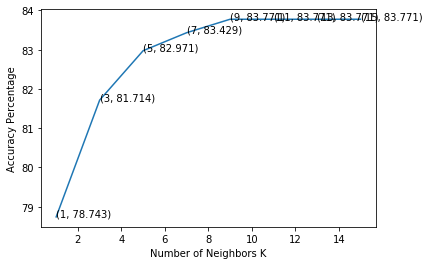

the Accuracy for each k value is :  [78.743 81.714 82.971 83.429 83.771 83.771 83.771 83.771]
*********************************************************************
optimal k value is:  9


In [18]:
optim_k_val = k_fold_cross_validation(x_1,y_1)

In [19]:
knn_optimal = KNeighborsClassifier(n_neighbors=optim_k_val)

# fitting the model
knn_optimal.fit(x_1, y_1)

# predict the response
pred = knn_optimal.predict(x_test)

# evaluate accuracy
acc = accuracy_score(y_test, pred) * 100
print('\nThe accuracy of the knn classifier for k = %d is %f%%' % (optim_k_val, acc))


The accuracy of the knn classifier for k = 9 is 85.111111%


# W2V

In [20]:
# Handle missing values : Replace with "No"
clean_data = ["No" if x != x else x for x in clean_data]

In [21]:
list_of_sen = []
for sen in clean_data:
    #print(sen)
    list_of_sen.append(sen.split())

In [22]:
from gensim.models import Word2Vec
from gensim.models import KeyedVectors
import pickle

is_your_ram_gt_16g=False
want_to_use_google_w2v = False
want_to_train_w2v = True

if want_to_train_w2v:
    # min_count = 5 considers only words that occured atleast 5 times
    w2v_model=Word2Vec(list_of_sen,min_count=5,size=50, workers=4)
    print("-"*110)
    print(w2v_model.wv.most_similar('great'))
    print('-'*115)
    print(w2v_model.wv.most_similar('worst'))
    print('-'*115)
    
    
elif want_to_use_google_w2v and is_your_ram_gt_16g:
    if os.path.isfile('GoogleNews-vectors-negative300.bin'):
        w2v_model=KeyedVectors.load_word2vec_format('GoogleNews-vectors-negative300.bin', binary=True)
        print('-'*115)
        print(w2v_model.wv.most_similar('great'))
        print('-'*115)
        print(w2v_model.wv.most_similar('worst'))
        print('-'*115)
    else:
        print("you don't have gogole's word2vec file, keep want_to_train_w2v = True, to train your own w2v ")

--------------------------------------------------------------------------------------------------------------
[('back', 0.9998879432678223), ('even', 0.9998872876167297), ('go', 0.9998866319656372), ('found', 0.999886155128479), ('per', 0.9998856782913208), ('looking', 0.9998856782913208), ('know', 0.9998837113380432), ('perfect', 0.999879002571106), ('also', 0.9998788833618164), ('fresh', 0.9998774528503418)]
-------------------------------------------------------------------------------------------------------------------
[('add', 0.9993545413017273), ('texture', 0.9993517994880676), ('prefer', 0.9993498921394348), ('far', 0.9993019104003906), ('delicious', 0.9992983937263489), ('waste', 0.9992833733558655), ('cup', 0.9992825388908386), ('said', 0.9992663264274597), ('hot', 0.9992501139640808), ('little', 0.9992491006851196)]
-------------------------------------------------------------------------------------------------------------------


In [23]:
w2v_words = list(w2v_model.wv.vocab)
print('-'*115)
print("number of words that occured minimum 5 times ",len(w2v_words))
print('-'*115)
print("sample words ", w2v_words[0:50])
print('-'*115)

-------------------------------------------------------------------------------------------------------------------
number of words that occured minimum 5 times  1731
-------------------------------------------------------------------------------------------------------------------
sample words  ['received', 'shipment', 'could', 'hardly', 'wait', 'try', 'product', 'love', 'call', 'instead', 'easily', 'daughter', 'designed', 'use', 'car', 'shop', 'going', 'lot', 'fun', 'everywhere', 'like', 'really', 'good', 'idea', 'outstanding', 'everybody', 'bought', 'made', 'two', 'cats', 'crazy', 'last', 'thing', 'want', 'cat', 'food', 'hate', 'buying', 'allows', 'make', 'big', 'nuts', 'fact', 'gold', 'little', 'show', 'people', 'edible', 'purchased', 'item']
-------------------------------------------------------------------------------------------------------------------


In [24]:
# average Word2Vec
# compute average word2vec for each review.
sent_vectors = []; # the avg-w2v for each sentence/review is stored in this list
for sent in tqdm(list_of_sen): # for each review/sentence
    sent_vec = np.zeros(50) # as word vectors are of zero length 50, you might need to change this to 300 if you use google's w2v
    cnt_words =0; # num of words with a valid vector in the sentence/review
    for word in sent: # for each word in a review/sentence
        if word in w2v_words:
            vec = w2v_model.wv[word]
            sent_vec += vec
            cnt_words += 1
    if cnt_words != 0:
        sent_vec /= cnt_words
    sent_vectors.append(sent_vec)
print(len(sent_vectors))
print(len(sent_vectors[0]))

100%|██████████| 1500/1500 [00:00<00:00, 1693.31it/s]

1500
50


In [25]:
# Total data frame
x = sent_vectors[0:50000]

# this is only Score/rating  of data
y = scores

In [26]:
#splitting the train and test data

x_1, x_test, y_1, y_test =train_test_split(x,y, test_size=0.2, random_state=0)

y_1 = np.array(y_1)
y_test = np.array(y_test)

x_1 = np.array(x_1)
x_test = np.array(x_test)


The optimal number of neighbors is 9.


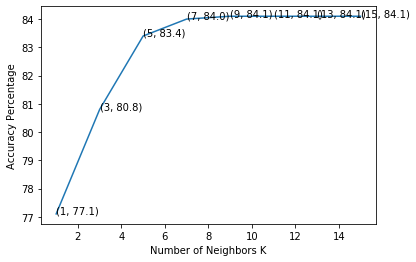

the Accuracy for each k value is :  [77.1 80.8 83.4 84.  84.1 84.1 84.1 84.1]
*********************************************************************
optimal k value is:  9


In [27]:
opt_val = k_fold_cross_validation(x_1,y_1)

In [28]:
knn_optimal = KNeighborsClassifier(n_neighbors=opt_val)

# fitting the model
knn_optimal.fit(x_1, y_1)

prediction = knn_optimal.predict(x_test)

acc = accuracy_score(y_test, prediction) * 100

print('\nThe accuracy of the knn classifier for k = %d is %f%%' % (opt_val, acc))


The accuracy of the knn classifier for k = 9 is 86.333333%


# Weighted TF-IDF W2V

In [29]:
# S = ["abc def pqr", "def def def abc", "pqr pqr def"]
model = TfidfVectorizer()
tf_idf_matrix = model.fit_transform(clean_data)
# we are converting a dictionary with word as a key, and the idf as a value
dictionary = dict(zip(model.get_feature_names(), list(model.idf_)))

In [30]:
# TF-IDF weighted Word2Vec
tfidf_feat = model.get_feature_names() # tfidf words/col-names
# final_tf_idf is the sparse matrix with row= sentence, col=word and cell_val = tfidf

tfidf_sent_vectors = []; # the tfidf-w2v for each sentence/review is stored in this list
row=0;
for sent in tqdm(list_of_sen): # for each review/sentence 
    sent_vec = np.zeros(50) # as word vectors are of zero length
    weight_sum =0; # num of words with a valid vector in the sentence/review
    for word in sent: # for each word in a review/sentence
        if word in w2v_words and word in tfidf_feat:
            vec = w2v_model.wv[word]
#             tf_idf = tf_idf_matrix[row, tfidf_feat.index(word)]
            # to reduce the computation we are 
            # dictionary[word] = idf value of word in whole courpus
            # sent.count(word) = tf valeus of word in this review
            tf_idf = dictionary[word]*(sent.count(word)/len(sent))
            sent_vec += (vec * tf_idf)
            weight_sum += tf_idf
    if weight_sum != 0:
        sent_vec /= weight_sum
    tfidf_sent_vectors.append(sent_vec)
    row += 1

100%|██████████| 1500/1500 [00:03<00:00, 461.07it/s]


In [31]:
len(tfidf_sent_vectors)

1500

In [32]:
x = tfidf_sent_vectors

y = scores

In [33]:
x_1, x_test, y_1, y_test =train_test_split(x,y, test_size=0.3, random_state = 0)


y_1 = np.array(y_1)
y_test = np.array(y_test)

x_1 = np.array(x_1)
x_test = np.array(x_test)


The optimal number of neighbors is 9.


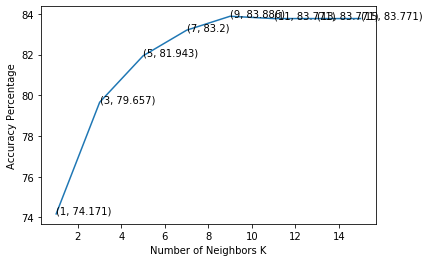

the Accuracy for each k value is :  [74.171 79.657 81.943 83.2   83.886 83.771 83.771 83.771]
*********************************************************************
optimal k value is:  9


In [34]:
opt_val = k_fold_cross_validation(x_1,y_1)

In [35]:
knn_optimal = KNeighborsClassifier(n_neighbors=3)

knn_optimal.fit(x_1,y_1)

pred = knn_optimal.predict(x_test)

acc = accuracy_score(y_test,pred) * 100

print('\nThe accuracy of the knn classifier for k = %d is %f%%' % (opt_val, acc))


The accuracy of the knn classifier for k = 9 is 81.111111%


# Results 
    1) BOW : k = 7 is 84.666667% 
    2) TF-IDF : k = 9 is 85.111111% 
    3) W2V : k = 9 is 86.666667% 
    4) Weighted TF-IDF W2V : k = 7 is 81.777778% 